In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime


In [2]:
path_xl = "AirPassenger.csv"
df = pd.read_csv(path_xl)
df.head()
df.dropna(inplace=True) #remove NAs
display(df.describe())

,Pax
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [3]:
# convert the 'Date' column to datetime format
df['Year-Month']= pd.to_datetime(df['Year-Month'],infer_datetime_format=True)
df=df.set_index(['Year-Month'])

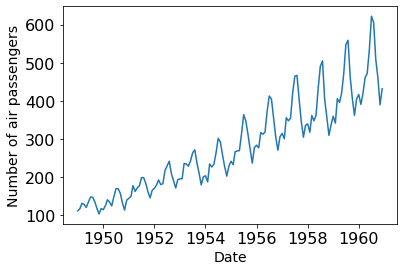

In [6]:
## plot graph
plt.xlabel('Date', fontsize="14")
plt.ylabel('Number of air passengers', fontsize="14")
plt.tick_params(labelsize=16);
plt.plot(df)

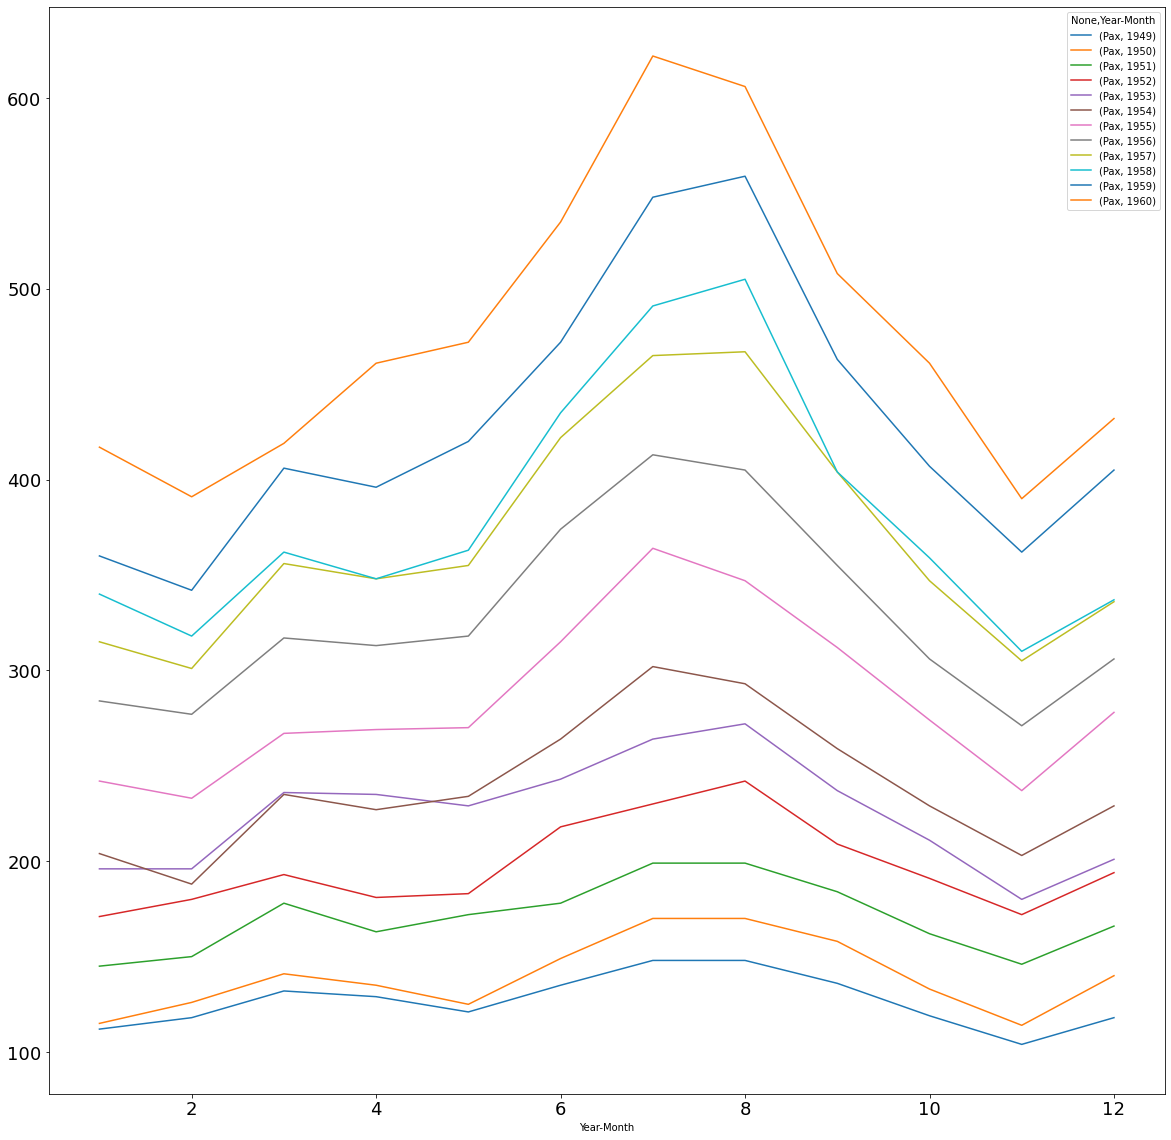

In [9]:
df.groupby([df.index.month,df.index.year]).sum().unstack().plot(figsize=(20,20), fontsize="14")
plt.tick_params(labelsize=18);

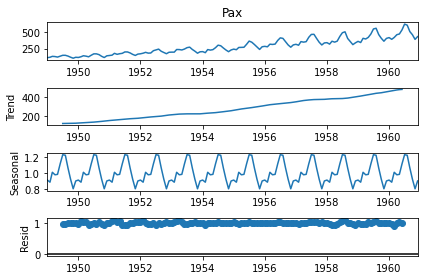

In [10]:
import statsmodels.api as sm
df_decompose = sm.tsa.seasonal_decompose(df['Pax'], model="multiplicative", period=12)
df_decompose.plot()
plt.show()

In [57]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(df['Pax'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)


#Interpreting the output

# Null hypothesis in ADF test is that Data is not stationary

# The test statistic is positive, meaning we fail to reject the null hypothesis 
# (it looks non-stationary).

# A p-value more than the critical value means we cannot reject H0, 
# we accept that there is a unit root and that the data is non-stationary.

# if Test Statistic < Critical Values => Rejects the null hypothesis.
# if Test Statistic >Critical Values => failed to reject the null hypothesis.

Dickey-Fuller Test: 
Test Statistic            0.815369
p-value                   0.991880
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


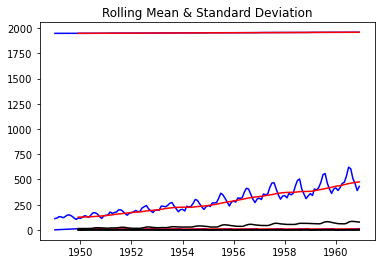

In [61]:
    #Determing rolling statistics
    rolmean = df.rolling(window=12).mean()
    rolstd = df.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(df, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

In [ ]:
#Fitting the automatic Arima function to the air passergers data set

autoarima(df['Pax'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                         Stepwise = true) # set to stepwise